In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
#importing the training dataset
dataset = pd.read_csv("sales_records.csv")
dataset.head()
#The datasest has 1460 records and 81 features. 

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
dataset["profit_per_unit"] = dataset["Total Profit"]/dataset["Units Sold"]

In [5]:
dataset.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,profit_per_unit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,95.86
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,88.59
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,126.25
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2.41
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,126.25


In [5]:
#checking for the sectors which have the maximum flow.
dataset["Item Type"].value_counts()

Cosmetics          13
Clothes            13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Cereal              7
Baby Food           7
Vegetables          6
Snacks              3
Meat                2
Name: Item Type, dtype: int64

In [ ]:
#Dummy variables are used in linear regression to predict. Check usability of this before applying. 

In [7]:
dataset["Region"].value_counts()

Sub-Saharan Africa                   36
Europe                               22
Asia                                 11
Australia and Oceania                11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: Region, dtype: int64

In [4]:
#finding the null values in the data
dataset.isnull().sum()
#There are no null datas in the dataset.

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [6]:
dataset.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [5]:
no_of_items= dataset["Item Type"].unique()
no_of_items

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [17]:
#for i in range(0, len(dataset)):
Units_sold = []
revenues = []
for j in no_of_items:
    dataset_1 = dataset[dataset["Item Type"] == "{}".format(j)]
    sums = dataset_1["Units Sold"].sum()
    revenue_item  = dataset_1["Total Revenue"].sum()
    Units_sold.append(sums)
    revenues.append(round(revenue_item))

print(revenues)
    


[10350328, 5322899, 30585380, 466481, 29889712, 3089057, 3980905, 7787293, 36601510, 2690795, 4503676, 2080733]


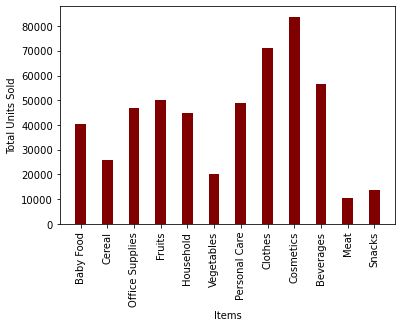

In [27]:
width = 0.4
plt.bar(no_of_items, Units_sold, color = "maroon", width = 0.4)
plt.xticks(rotation = 90)
plt.xlabel("Items")
plt.ylabel("Total Units Sold")
plt.show()
#Here we can see that the maximum order generated is from the cosmetics section and the lowest order generated is from the
 # meat section.

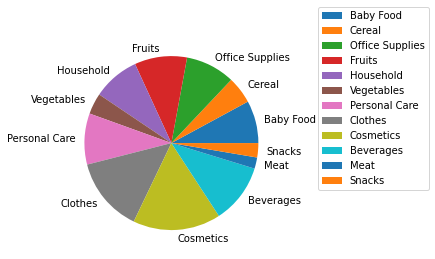

In [34]:
plt.pie(Units_sold,labels = no_of_items)
plt.legend(bbox_to_anchor = (1.15, 1.15))
plt.show()

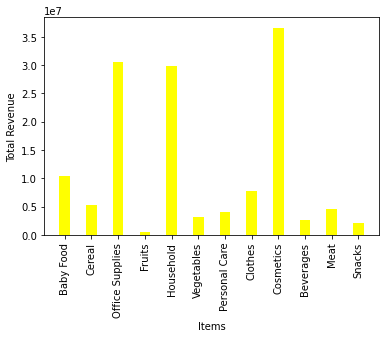

In [21]:
plt.bar(no_of_items, revenues, color = "yellow", width = 0.4)
plt.xlabel("Items")
plt.ylabel("Total Revenue")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# show subplots in which it shows the unit cost of production region wise.

In [6]:
regions = dataset["Region"].unique()
regions

array(['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America'], dtype=object)

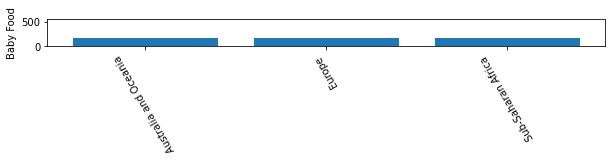

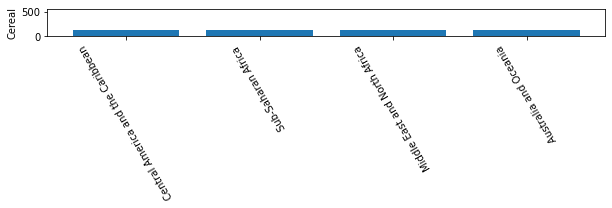

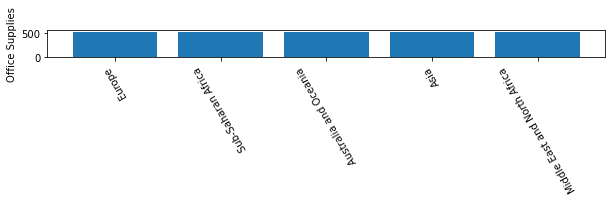

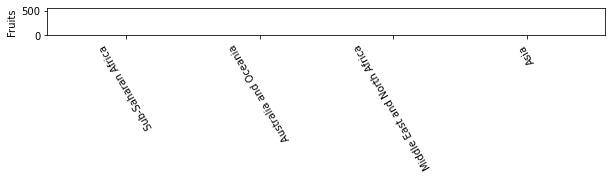

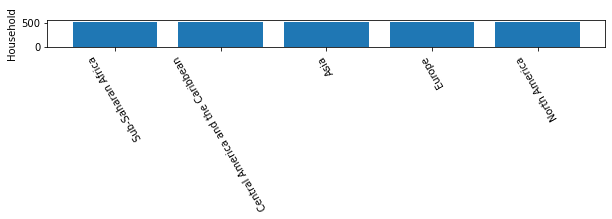

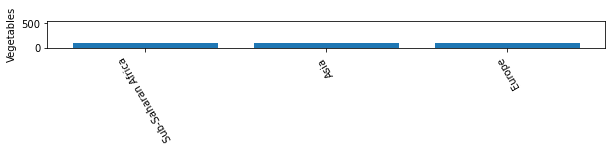

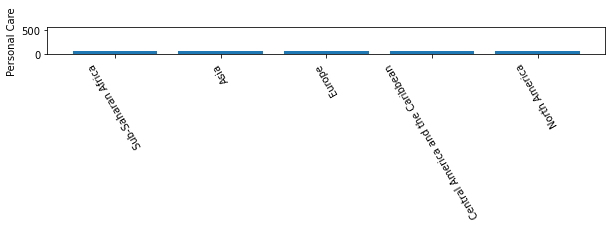

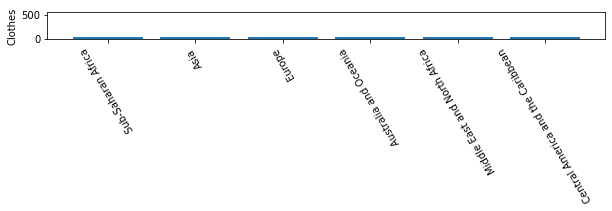

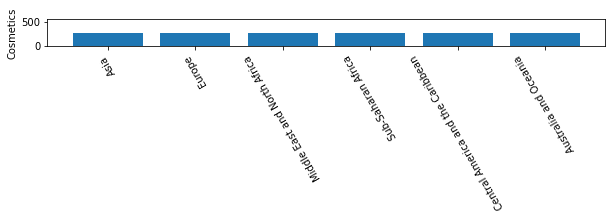

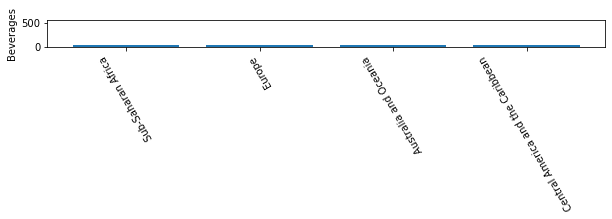

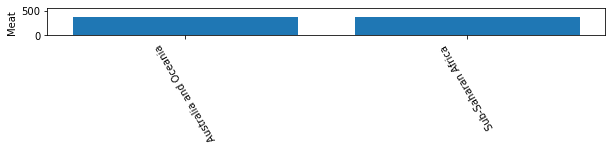

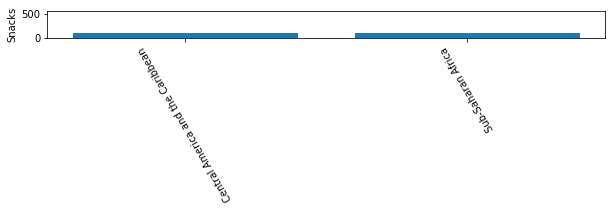

In [12]:
#displaying the bar graph to compare the unit cost of each good in different countries. 
plt.rcParams['figure.figsize'] = [10,7]
for i in range(1,len(no_of_items)+1):
    plt.subplot(len(no_of_items),1, i)
    plt.bar(dataset[dataset["Item Type"]=="{}".format(no_of_items[i-1])]["Region"].unique(), dataset[dataset["Item Type"] == "{}".format(no_of_items[i-1])].groupby("Region").first()["Unit Cost"])
    plt.xticks(rotation=120)
    plt.ylim(0,550)
    plt.ylabel("{}".format(no_of_items[i-1]))
    plt.show()
#This shows that the unit cost of production of all the items are same across all regions. And hence no improvement can be 
 #brought about im this sector.

In [22]:
#To check which region generates sales through which channels.
channel = dataset["Sales Channel"].unique()

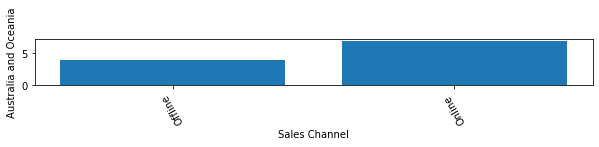

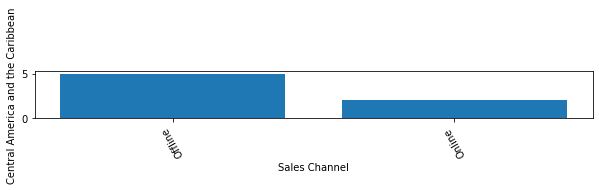

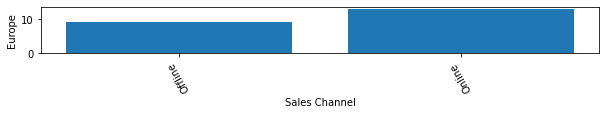

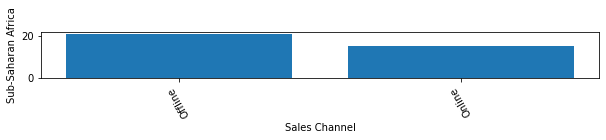

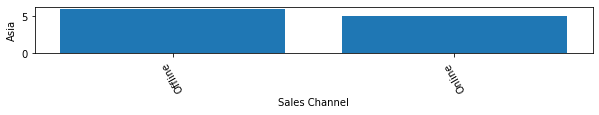

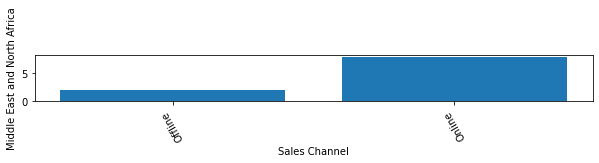

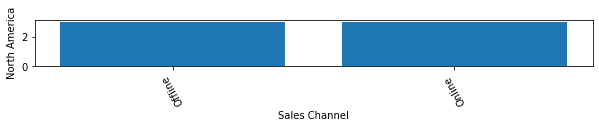

In [18]:
for i in range(1, len(regions)+1):
    plt.subplot(len(regions), 1, i)
    plt.bar(channel, dataset[dataset["Region"] == "{}".format(regions[i-1])].groupby("Sales Channel").count()["Region"])
    plt.xlabel("Sales Channel")
    plt.xticks(rotation = 120)
    plt.ylabel("{}".format(regions[i-1]))
    plt.show()

In [27]:
dataset[dataset["Region"] == "Asia"].groupby("Item Type").aggregate()